In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
np.set_printoptions(threshold=33500)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
from collections import OrderedDict


In [2]:
incidents = pd.read_csv('unique_fires.csv')
incidents

,Incident Number,Fire Name,First Day,Last Day,Lat Fire,Lon Fire
0,10662156.0,C34,2019-02-13 15:00:00,2019-02-15,36.995278,-102.524722
1,10662179.0,2161,2019-02-13 16:40:00,2019-02-14,35.221389,-101.518611
2,10662684.0,PAINTED WAGON,2019-04-08 13:02:00,2019-04-10,33.786944,-112.753333
3,10663171.0,LONE MOUNTAIN,2019-05-26 23:56:00,2019-07-03,33.808056,-105.738611
4,10663525.0,BOULDER,2019-06-05 12:45:00,2019-06-06,35.333056,-119.905556
...,...,...,...,...,...,...
1350,11979081.0,LAURA 2,2020-11-17 13:30:00,2020-11-23,40.034034,-120.115073
1351,11979237.0,Trail,2020-10-24 21:32:00,2020-11-02,34.147222,-112.117778
1352,11980186.0,SANDERSON,2020-12-13 03:00:00,2020-12-14,33.889444,-117.070833
1353,11980587.0,CREEK 5,2020-12-24 01:22:00,2020-12-28,33.402646,-117.266795


In [17]:
print(type(incidents['First Day'].values))

incidents['year'] = [incidents['First Day'].values[ii][0:4] for ii in range(len(incidents))]
incidents

<class 'numpy.ndarray'>


,Incident Number,Fire Name,First Day,Last Day,Lat Fire,Lon Fire,geometry,year
0,10662156.0,C34,2019-02-13 15:00:00,2019-02-15,36.995278,-102.524722,POINT (-102.52472 36.99528),2019
1,10662179.0,2161,2019-02-13 16:40:00,2019-02-14,35.221389,-101.518611,POINT (-101.51861 35.22139),2019
2,10662684.0,PAINTED WAGON,2019-04-08 13:02:00,2019-04-10,33.786944,-112.753333,POINT (-112.75333 33.78694),2019
3,10663171.0,LONE MOUNTAIN,2019-05-26 23:56:00,2019-07-03,33.808056,-105.738611,POINT (-105.73861 33.80806),2019
4,10663525.0,BOULDER,2019-06-05 12:45:00,2019-06-06,35.333056,-119.905556,POINT (-119.90556 35.33306),2019
...,...,...,...,...,...,...,...,...
1350,11979081.0,LAURA 2,2020-11-17 13:30:00,2020-11-23,40.034034,-120.115073,POINT (-120.11507 40.03403),2020
1351,11979237.0,Trail,2020-10-24 21:32:00,2020-11-02,34.147222,-112.117778,POINT (-112.11778 34.14722),2020
1352,11980186.0,SANDERSON,2020-12-13 03:00:00,2020-12-14,33.889444,-117.070833,POINT (-117.07083 33.88944),2020
1353,11980587.0,CREEK 5,2020-12-24 01:22:00,2020-12-28,33.402646,-117.266795,POINT (-117.26680 33.40265),2020


In [53]:
#make a gpd dataframe in LCC, and plot the points
incidents['geometry'] =[Point(incidents['Lon Fire'].iloc[ii], incidents['Lat Fire'].iloc[ii]) for ii in range(len(incidents))]
inci_gdf_plot = gpd.GeoDataFrame(incidents, geometry='geometry',crs='epsg:4326')


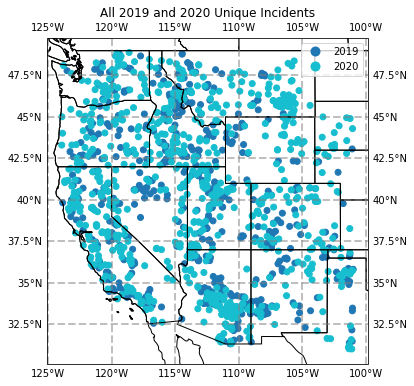

In [54]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
inci_gdf_plot.plot(ax=ax,column='year',legend=True)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
plt.title('All 2019 and 2020 Unique Incidents')
plt.show()

In [56]:
print('we have '+str(len(inci_gdf[inci_gdf_plot['year']=='2019']))+ ' 2019 fires')
print('we have '+str(len(inci_gdf[inci_gdf_plot['year']=='2020']))+ ' 2020 fires')

we have 540 2019 fires
we have 815 2020 fires
